In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle

[nltk_data] Downloading package stopwords to C:\Users\Tamim
[nltk_data]     Amin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("train.csv", sep=';', on_bad_lines='skip')

In [3]:
df.head(5)

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


In [4]:
df.describe()

,Unnamed: 0,label
count,24353.000000,24353.000000
mean,12176.000000,0.543917
std,7030.249889,0.498078
min,0.000000,0.000000
25%,6088.000000,0.000000
50%,12176.000000,1.000000
75%,18264.000000,1.000000
max,24352.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24353 non-null  int64 
 1   title       24353 non-null  object
 2   text        24353 non-null  object
 3   label       24353 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 761.2+ KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [7]:
df=df.fillna('')

In [8]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [11]:
df = df.drop(['Unnamed: 0', 'title'], axis=1)

In [12]:
df.head()

,text,label
0,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,While the controversy over Trump s personal ta...,0
3,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,There has never been a more UNCOURAGEOUS perso...,0


In [13]:
port_stem=PorterStemmer()

In [14]:
port_stem 

<PorterStemmer>

In [16]:
port_stem.stem('Hi ThIs is Tamim Amin @@#') 

'hi this is tamim amin @@#'

In [17]:
def stemming(content):
    con=re.sub('[^a-zA-Z]', ' ', content)
    con=con.lower()
    con=con.split() 
    con = [port_stem.stem(word) for word in con if word not in stopwords.words('english')] 
    con=' '.join(con) 
    return con

In [18]:
stemming('Hi ThIs is Tamim Amin @@#')

'hi tamim amin'

In [19]:
df['text']=df['text'].apply(stemming)

In [48]:
x=df['text']

In [49]:
y=df['label']

In [50]:
x.shape

(24353,)

In [51]:
y.shape

(24353,)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [53]:
vect=TfidfVectorizer()

In [54]:
x_train=vect.fit_transform(x_train)
x_test=vect.transform(x_test)

In [55]:
x_train.shape

(19482, 68642)

In [56]:
pickle.dump(vect, open('vector.pkl', 'wb'))

In [57]:
vector_form = pickle.load(open('vector.pkl', 'rb'))

In [58]:
x_test.shape

(4871, 68642)

In [59]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [60]:
model.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [61]:
prediction=model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2199
           1       0.98      0.97      0.97      2672

    accuracy                           0.97      4871
   macro avg       0.97      0.97      0.97      4871
weighted avg       0.97      0.97      0.97      4871



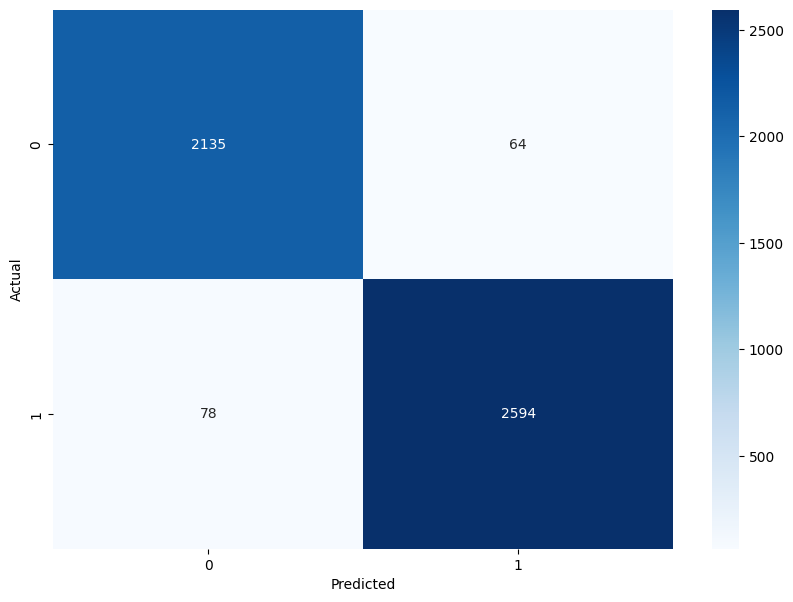

In [62]:

cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
score = accuracy_score(y_test, prediction)
print(f"Accuracy: {score*100:.2f}%")

Accuracy: 97.08%


In [64]:
# 1. Training Accuracy
train_acc = model.score(x_train, y_train)
print(f"Training Accuracy: {train_acc * 100:.2f}%")

# 2. Testing Accuracy
test_acc = model.score(x_test, y_test)
print(f"Testing Accuracy:  {test_acc * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy:  97.08%


In [65]:
pickle.dump(model, open('model.pkl', 'wb'))

In [66]:
vector_form=pickle.load(open('vector.pkl', 'rb'))

In [67]:
load_model=pickle.load(open('model.pkl', 'rb'))

In [68]:
def fake_new(news):
    news=stemming(news)
    input_data=[news]
    vector_form1=vector_form.transform(input_data)
    prediction=load_model.predict(vector_form1)
    return prediction

In [69]:
val=fake_new("""Heiress To Disney Empire Knows GOP Scammed Us – SHREDS Them For Tax Bill;Abigail Disney is an heiress with brass ovaries who will profit from the GOP tax scam bill but isn t into f-cking poor people over. Ms. Disney penned an op-ed for USA Today in which she rips the GOP a new one because she has  always been cognizant of income and wealth inequality.  In other words, she is not Donald Trump, Paul Ryan or Bob Corker. Or Mitch McConnell. She is Abigail Disney, dammit. Since the election of Ronald Reagan, the gap between rich and poor has grown dramatically and  trickle down  economics has turned out to cause more of a trickle up,  she writes.  But nothing has brought the problem of inequality into sharper focus for me than the current proposals by Republicans to overhaul the tax system. Disney says that this proposal will be burdensome to the middle class while decreasing  the responsibility of the wealthy to contribute to the common good. And then she dropped a truth bomb. (We like truth bombs.)Republicans insist this plan will cut taxes for the middle class, but the truth is that any meager savings will be offset by losses elsewhere   in deductions no longer allowed, loss of Medicaid and Medicare coverage, and less funding for education, all of which are on the chopping block in order to provide a tax cut for a few very wealthy people like me. There is even a tax break to private jet owners. This bill will give me this tax cut while also killing health insurance for over 13 million people,  Disney wrote.  It will let me pass over $20 million to my children, tax-free. And all my friends with private jets? They get a tax cut too. With a suffocating education system, a dying infrastructure and a national debt that will be at least $1.5 trillion bigger, that social mobility will be far out of reach for people like you,  Disney continued.  But I will be able to stay comfortably right where I am. Does that strike you as fair? No, it does not, thankyouverymuch. But given how this bill was written, I think it s looking a lot like a nightmare from Pirates of the Caribbean,  Disney wrote.  Have I made you angry yet? I really hope I ve made you angry. You should be. No one who votes for this tax bill will be voting with your life in mind. But you will pay for it. Watch:This Disney heiress is taking a stand against the GOP tax bill  even though she s going to benefit from it pic.twitter.com/E5bmcI83mU  NowThis (@nowthisnews) December 20, 2017 If democracy is just a bunch of people advocating for their own self-interest instead of the interests of the greater good, then we re not a democracy, we re anarchy,  Disney added.  We need to start voting and acting as citizens as though the common good matters more than our own personal well-being. This isn t tax reform. It s a heist.Photo by Ralph Orlowski/Getty Images for Burda Media.""")

In [70]:
val

array([0])

In [71]:
if val==[0]:
    print("Fake News")
else:
    print("Not a Fake News")

Fake News
